In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib.ticker as ticker

In [127]:
df = pd.read_csv('datasets/cars_moldova.csv', sep=',')
df.head(5)
df.describe()

,Year,Distance,Engine_capacity(cm3),Price(euro)
count,32534.000000,32534.000000,32534.000000,32534.000000
mean,2008.233110,181664.016598,1866.865925,9416.256224
std,7.243986,99126.563403,609.448832,9516.934622
min,1971.000000,1.000000,200.000000,200.000000
25%,2004.000000,122000.000000,1500.000000,3500.000000
50%,2009.000000,180000.000000,1800.000000,6700.000000
75%,2014.000000,236826.750000,2000.000000,12000.000000
max,2021.000000,1000000.000000,5000.000000,100000.000000


# 1.  Выполните визуализацию данных с использованием библиотеки Pandas:

Text(0.5, 0.98, 'Средняя цена от марки автомабиля')

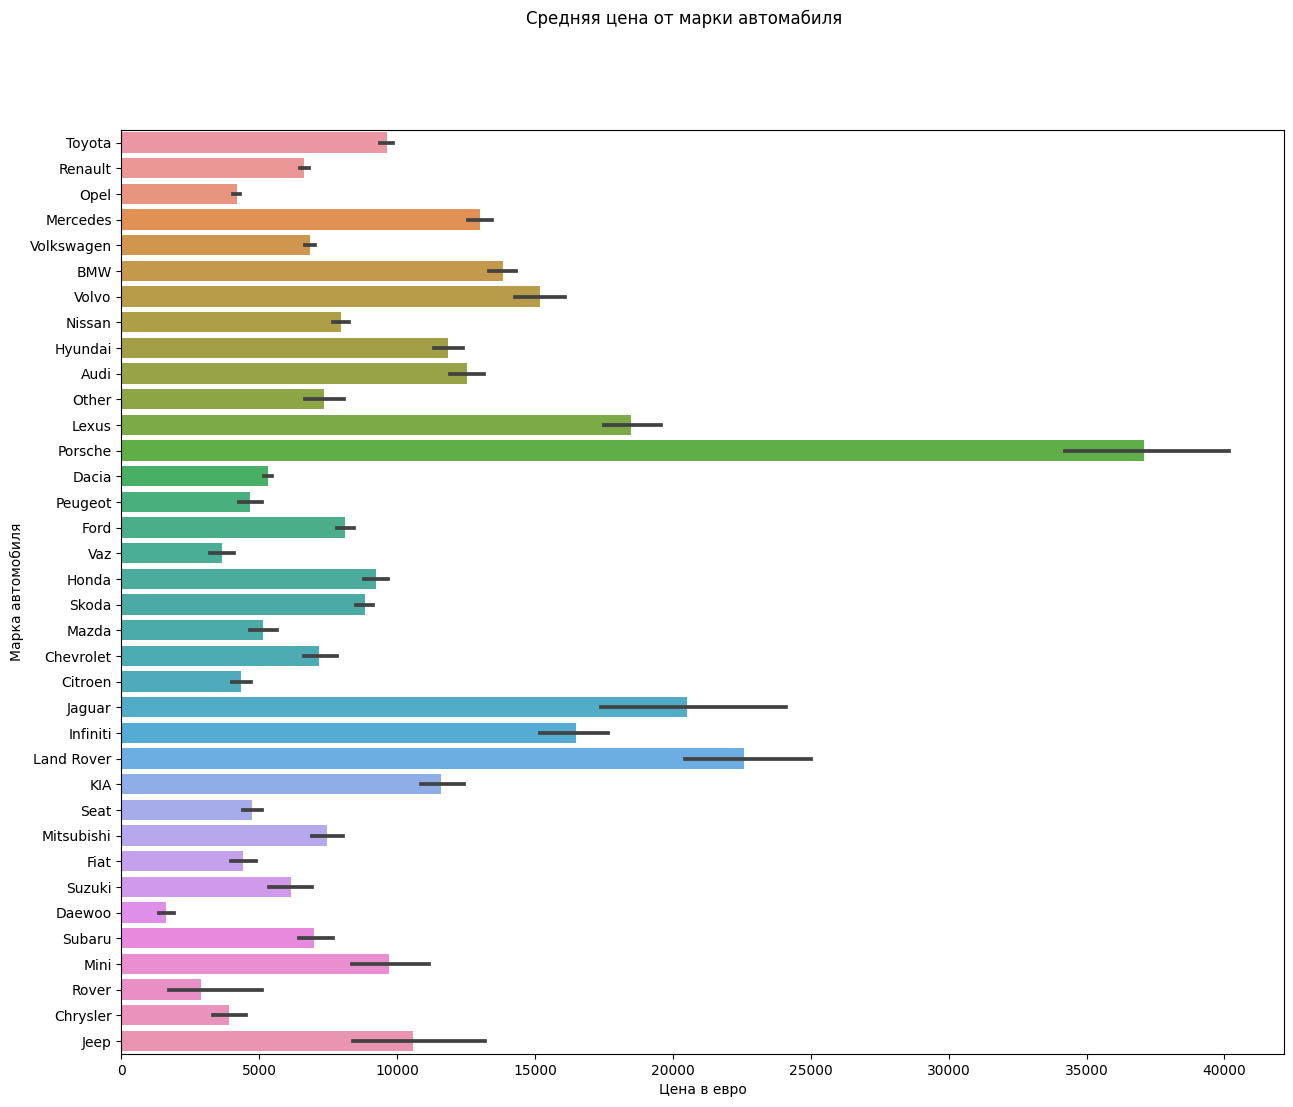

In [35]:
counts = df['Make'].value_counts()

def reduceUniques(label: str) -> str:
    if counts[label] < 50:
        return 'Other'
    return label

df['Make'] = df['Make'].apply(reduceUniques)

fig, ax = plt.subplots(figsize=(15, 12))

sns.barplot(
    data=df,
    y='Make',
    x='Price(euro)',
    orient='h',
    ax=ax,
)
ax.set_xlabel('Цена в евро')
ax.set_ylabel('Марка автомобиля')
fig.suptitle('Средняя цена от марки автомабиля')


Text(0.5, 0.98, 'Матрица зависимостей переменных друг от друга, в разрезе трансмиссии')

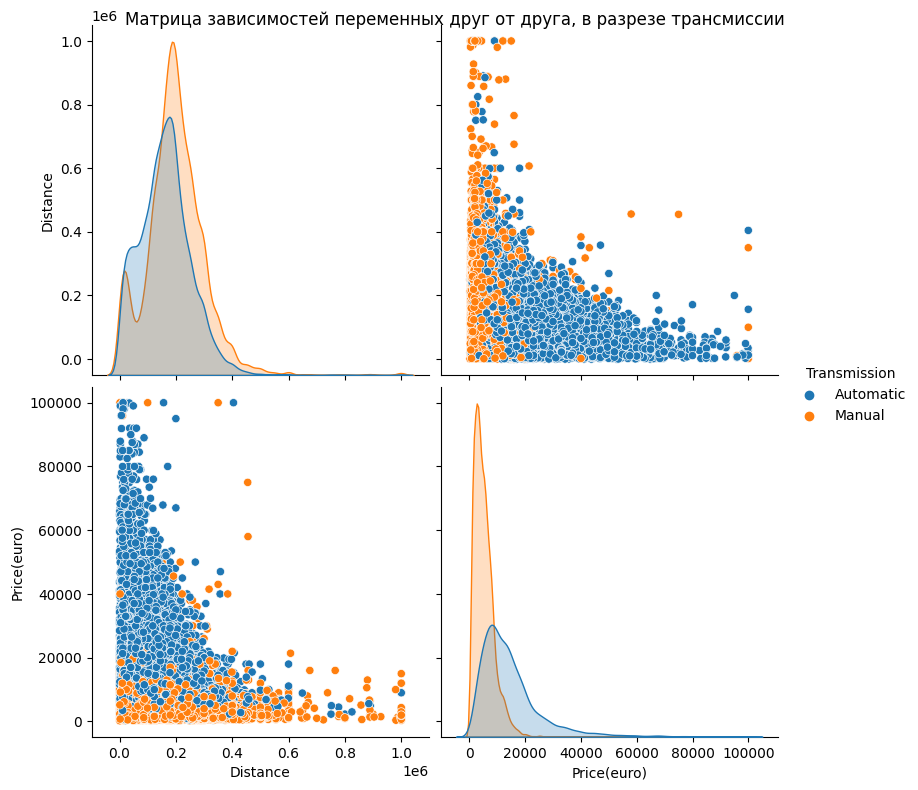

In [60]:
pair = sns.pairplot(
    data=df,
    hue='Transmission',
    vars=['Distance', 'Price(euro)'],
    height=4
)
plt.gcf().suptitle('Матрица зависимостей переменных друг от друга, в разрезе трансмиссии')

# Видим +- одинаковое распределение пробега
# Цена на авто с автоматической трансмиссией значительно выше, и разброс цен больше

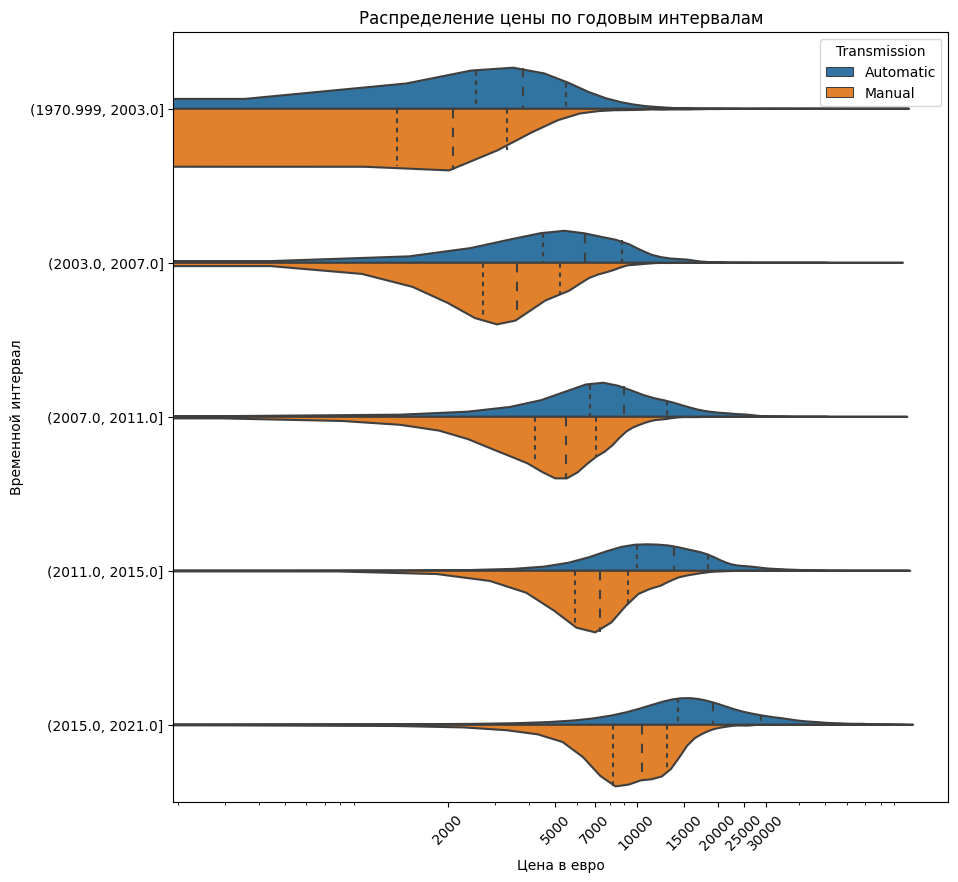

In [154]:
plt.figure(figsize=(10, 10))
X = pd.qcut(df['Year'], q=5)
Y = df['Price(euro)']
plot = sns.violinplot(
    y=X,
    x=Y,
    hue=df['Transmission'],
    orient='h',
    split=True,
    inner = "quartile"
)
plot.set_xscale('log')
plot.set_title('Распределение цены по годовым интервалам')
plot.set_xlabel('Цена в евро')
plot.set_ylabel('Временной интервал')
plot.set_xticks([2000, 5000, 7000, 10_000, 15_000, 20_000, 25_000, 30_000]);
plt.gca().get_xaxis().set_major_formatter(ticker.ScalarFormatter())
plt.gca().tick_params(axis='x', labelrotation=45)

# Можем увидеть постепенное увеличиние цены автомобиля в зависимости от года выпуска.
# При этом авто с автоматической трансмиссией имеют, стали дороже по отношению к ручной трансмиссии. 
# Это мы можем увидеть по смещений квартилей синего распределения вправо
# Первые распределения даже после очистики имеют выбросы в цене, это связано с логарифмическим скейлингом .